<div class="alert alert-block alert-danger">  
<h1><center><strong>Twitter(X) Sentiment Analysis Using Neural Networks:

---


 </center></strong></h1></div>


GPU/CPU Check

In [1]:
import tensorflow as tf
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [2]:
tf.config.list_physical_devices('CPU')

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [3]:
CheckList = ["GPU", "CPU"]
for device in CheckList:
  out_ = tf.config.list_physical_devices(device)
  if len(out_) > 0:
    print(f"{device} is available")
    print("details\n",out_)
  else:
    print(f"{device} not available")


GPU is available
details
 [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
CPU is available
details
 [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


In [4]:
from google.colab import drive

In [5]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<div class="alert alert-block alert-danger">  
<h2><center><strong>Importing Python Libraries 📕 📗 📘 📙</strong></center></h2>
        
</div>

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from tensorflow import keras
plt.style.use('ggplot')
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report, confusion_matrix
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.cm as cm
from matplotlib import rcParams
from collections import Counter
from nltk.tokenize import RegexpTokenizer
import re
import string
from tensorflow.keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

<h3><strong> Exploratory Data Analysis</h3></strong

<h4>Cleaning The dataset </h4>

In [7]:
# Load Tweet dataset
df1 = pd.read_csv('/content/drive/MyDrive/Project21/Twitter_Dataset.csv', encoding='ISO-8859-1')
# Output first five rows
df1.head()

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [8]:
# Load Tweet dataset
df1 = pd.read_csv('/content/drive/MyDrive/Project21/Twitter_Dataset.csv', encoding='ISO-8859-1')
# Output first five rows
df1.tail()

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
1048570,4,1960186342,Fri May 29 07:33:44 PDT 2009,NO_QUERY,Madelinedugganx,My GrandMa is making Dinenr with my Mum
1048571,4,1960186409,Fri May 29 07:33:43 PDT 2009,NO_QUERY,OffRoad_Dude,Mid-morning snack time... A bowl of cheese noo...
1048572,4,1960186429,Fri May 29 07:33:44 PDT 2009,NO_QUERY,Falchion,@ShaDeLa same here say it like from the Termi...
1048573,4,1960186445,Fri May 29 07:33:44 PDT 2009,NO_QUERY,jonasobsessedx,@DestinyHope92 im great thaanks wbuu?
1048574,4,1960186607,Fri May 29 07:33:45 PDT 2009,NO_QUERY,sugababez,cant wait til her date this weekend


In [9]:
# Load Tweet dataset
df = pd.read_csv('/content/drive/MyDrive/Project21/Twitter_Dataset.csv', encoding='ISO-8859-1')
# Output first five rows
print(df.head())

# To display the column names correctly
print(df.columns)

   0  1467810369  Mon Apr 06 22:19:45 PDT 2009  NO_QUERY _TheSpecialOne_  \
0  0  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY   scotthamilton   
1  0  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY        mattycus   
2  0  1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY         ElleCTF   
3  0  1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY          Karoli   
4  0  1467811372  Mon Apr 06 22:20:00 PDT 2009  NO_QUERY        joy_wolf   

  @switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D  
0  is upset that he can't update his Facebook by ...                                                                   
1  @Kenichan I dived many times for the ball. Man...                                                                   
2    my whole body feels itchy and like its on fire                                                                    
3  @nationwideclass no, it's not behaving at all....           

In [10]:
# Output the first row of the DataFrame
print(df.iloc[0])

# Output the first three rows of the DataFrame
print(df.iloc[0:3])

0                                                                                                                                                                      0
1467810369                                                                                                                                                    1467810672
Mon Apr 06 22:19:45 PDT 2009                                                                                                                Mon Apr 06 22:19:49 PDT 2009
NO_QUERY                                                                                                                                                        NO_QUERY
_TheSpecialOne_                                                                                                                                            scotthamilton
@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D    is upset that he can't update his Fa

In [11]:
import pandas as pd
train = pd.read_csv('/content/drive/MyDrive/Project21/Twitter_Dataset.csv', encoding='ISO-8859-1')
test = pd.read_csv('/content/drive/MyDrive/Project21/Twitter_Dataset.csv', encoding='ISO-8859-1')

# Display the shape of both DataFrames
print(train.shape)
print(test.shape)

(1048575, 6)
(1048575, 6)


So We have 1048575 tweets in the train set and tweets in the test set

In [12]:
train.dropna(inplace=True)

In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 6 columns):
 #   Column                                                                                                               Non-Null Count    Dtype 
---  ------                                                                                                               --------------    ----- 
 0   0                                                                                                                    1048575 non-null  int64 
 1   1467810369                                                                                                           1048575 non-null  int64 
 2   Mon Apr 06 22:19:45 PDT 2009                                                                                         1048575 non-null  object
 3   NO_QUERY                                                                                                             1048575 non-null  object
 4   _

In [14]:
import pandas as pd

# Load the dataset (ensure the file path is correct)
df_train = pd.read_csv('/content/drive/MyDrive/Project21/Twitter_Dataset.csv', encoding='ISO-8859-1')

# Display the first five rows of the DataFrame
df_train.head()

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [15]:
df_train.tail()

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
1048570,4,1960186342,Fri May 29 07:33:44 PDT 2009,NO_QUERY,Madelinedugganx,My GrandMa is making Dinenr with my Mum
1048571,4,1960186409,Fri May 29 07:33:43 PDT 2009,NO_QUERY,OffRoad_Dude,Mid-morning snack time... A bowl of cheese noo...
1048572,4,1960186429,Fri May 29 07:33:44 PDT 2009,NO_QUERY,Falchion,@ShaDeLa same here say it like from the Termi...
1048573,4,1960186445,Fri May 29 07:33:44 PDT 2009,NO_QUERY,jonasobsessedx,@DestinyHope92 im great thaanks wbuu?
1048574,4,1960186607,Fri May 29 07:33:45 PDT 2009,NO_QUERY,sugababez,cant wait til her date this weekend


Lets look at the distribution of tweets in the train set

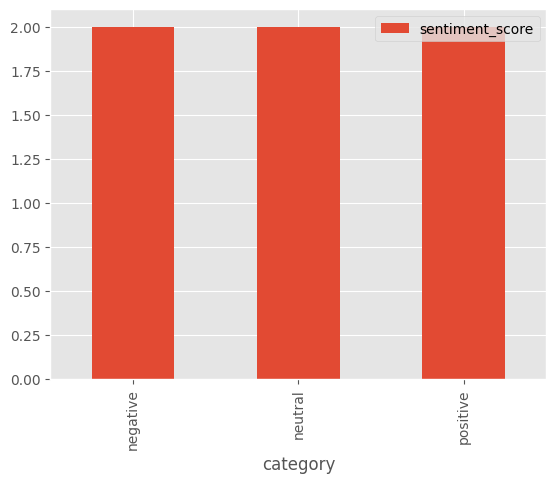

In [16]:
# DataFrame definition
data = {
    'category': ['positive', 'neutral', 'negative', 'positive', 'negative', 'neutral'],
    'sentiment_score': [0.9, 0.1, -0.5, 0.8, -0.7, 0.0]
}
df = pd.DataFrame(data)

# Now you can plot the distribution of sentiments
df.groupby('category').count().plot(kind='bar')
plt.show()

#### Checking Null values

In [17]:
import pandas as pd
import numpy as np

data = {
    'column1': [1, 2, None, 4],
    'column2': ['a', 'b', 'c', None]
}

# Convert dictionary to DataFrame
df = pd.DataFrame(data)

# Check for missing values
missing_values_count = np.sum(df.isnull().any(axis=1))
print(missing_values_count)

2


#### Rows and columns in the dataset

In [18]:
import pandas as pd

# Example: Load a CSV file into a DataFrame
data = pd.read_csv('/content/drive/MyDrive/Project21/Twitter_Dataset.csv', encoding='ISO-8859-1')

# Print the count of columns
print('Count of columns in the data is:', len(data.columns))
print('Count of rows in the data is:  ', len(data))


Count of columns in the data is: 6
Count of rows in the data is:   1048575


In [19]:
import pandas as pd
data_train = {
    'text': ['This is a sample text.', 'Another example.', 'And one more.']
}
data_test = {
    'text': ['Testing data here.', 'Yet another test.', 'Final example text.']
}

# Creating DataFrames
df_train = pd.DataFrame(data_train)
df_test = pd.DataFrame(data_test)

# Adding a 'length' column to each DataFrame that calculates the length of each 'text'
df_train["length"] = df_train["text"].apply(lambda x: len(x))
df_test["length"] = df_test["text"].apply(lambda x: len(x))

# Displaying the statistics for 'length'
print("Train Length Stat")
print(df_train["length"].describe())

print("\nTest Length Stat")
print(df_test["length"].describe())

Train Length Stat
count     3.000000
mean     17.000000
std       4.582576
min      13.000000
25%      14.500000
50%      16.000000
75%      19.000000
max      22.000000
Name: length, dtype: float64

Test Length Stat
count     3.0
mean     18.0
std       1.0
min      17.0
25%      17.5
50%      18.0
75%      18.5
max      19.0
Name: length, dtype: float64


<h1><center><strong>Data Preprocessing📝</strong></center></h1>

#### Selecting the text and label coloumn

In [20]:
import pandas as pd

# Example list of dictionaries
data_list = [{'text': 'sample text 1', 'label': 0},
             {'text': 'sample text 2', 'label': 1},
             {'text': 'sample text 3', 'label': 0}]

# Convert list to DataFrame
data = pd.DataFrame(data_list)

# Select specific columns
data = data[['text', 'label']]
print(data)

            text  label
0  sample text 1      0
1  sample text 2      1
2  sample text 3      0


#### Assigning 1 to Positive sentment 4

In [21]:
data['label'][data['label']==4]=1

#### Separating positive and negative tweets

In [22]:
data_pos = data[data['label'] == 1]
data_neg = data[data['label'] == 0]

#### taking one fourth data so we can run on our machine easily

In [23]:
data_pos = data_pos.iloc[:int(20000)]
data_neg = data_neg.iloc[:int(20000)]

#### Combining positive and negative tweets

In [24]:
data = pd.concat([data_pos, data_neg])

#### Making The Text In Lower Case

In [25]:
data['text']=data['text'].str.lower()

In [26]:
data['text'].tail()

,text
1,sample text 2
0,sample text 1
2,sample text 3


#### Cleaning and removing Stop words of english

In [27]:
import nltk
nltk.download('stopwords')
stopwords_list = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [28]:
from nltk.corpus import stopwords
", ".join(stopwords.words('english'))

"i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, no, nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don, don't, should, should've, now, d, ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, ma, mightn, mightn't, mustn, mus

#### Cleaning and removing the above stop words list from the tweet text

In [29]:
STOPWORDS = set(stopwords.words('english'))
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
data['text'] = data['text'].apply(lambda text: cleaning_stopwords(text))
data['text'].head()

,text
1,sample text 2
0,sample text 1
2,sample text 3


#### Cleaning and removing punctuations

In [30]:
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)

In [31]:
data['text']= data['text'].apply(lambda x: cleaning_punctuations(x))
data['text'].tail()

,text
1,sample text 2
0,sample text 1
2,sample text 3


#### Cleaning and removing repeating characters

In [32]:
def cleaning_repeating_char(text):
    return re.sub(r'(.)\1+', r'\1', text)

In [33]:
data['text'] = data['text'].apply(lambda x: cleaning_repeating_char(x))
data['text'].tail()

,text
1,sample text 2
0,sample text 1
2,sample text 3


#### Cleaning and removing email

In [34]:
def cleaning_email(data):
    return re.sub('@[^\s]+', ' ', data)

In [35]:
data['text']= data['text'].apply(lambda x: cleaning_email(x))
data['text'].tail()

,text
1,sample text 2
0,sample text 1
2,sample text 3


#### Cleaning and removing URL's

In [36]:
def cleaning_URLs(data):
    return re.sub('((www\.[^\s]+)|(https?://[^\s]+))',' ',data)

In [37]:
data['text'] = data['text'].apply(lambda x: cleaning_URLs(x))
data['text'].tail()

,text
1,sample text 2
0,sample text 1
2,sample text 3


#### Cleaning and removing Numeric numbers

In [38]:
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)

In [39]:
data['text'] = data['text'].apply(lambda x: cleaning_numbers(x))
data['text'].tail()

,text
1,sample text
0,sample text
2,sample text


#### Getting tokenization of tweet text

In [40]:
tokenizer = RegexpTokenizer(r'\w+')
data['text'] = data['text'].apply(tokenizer.tokenize)

#### Applying Stemming

In [41]:
st = nltk.PorterStemmer()
def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return data

data['text']= data['text'].apply(lambda x: stemming_on_text(x))

#### Applying Lemmatizer

In [42]:
import nltk
nltk.download('wordnet')
lm = nltk.WordNetLemmatizer()
def lemmatizer_on_text(data):
    text = [lm.lemmatize(word) for word in data]
    return data

data['text'] = data['text'].apply(lambda x: lemmatizer_on_text(x))

[nltk_data] Downloading package wordnet to /root/nltk_data...


In [43]:
data['text'].head()

,text
1,"[sample, text]"
0,"[sample, text]"
2,"[sample, text]"


####  Separating input feature and label

In [44]:
X=data.text
y=data.label

#### Preparing the input features for training
- We converting the text words into arrays form.
- Maximum 500 features/words selected for training. These 500 words will be selected on the importance that will distinguish between the positive tweets and negative tweets.

In [45]:
max_len = 500
tok = Tokenizer(num_words=2000)
tok.fit_on_texts(X)
sequences = tok.texts_to_sequences(X)
sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)

As we can see that there total 40000 tweets and the number words/features are 500.

In [46]:
sequences_matrix.shape

(3, 500)

#### Separating the 70% data for training data and 30% for testing data

As we prepared all the tweets, now we are separating/splitting the tweets into training data and testing data.
- 70% tweets will be used in the training
- 30% tweets will be used to test the performance of the model.

In [47]:
X_train, X_test, Y_train, Y_test = train_test_split(sequences_matrix, y, test_size=0.3, random_state=2)

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
#import datasets
tips = sns.load_dataset('tips')
iris = sns.load_dataset('iris')

In [49]:
tips.sample(2)

,total_bill,tip,sex,smoker,day,time,size
160,21.50,3.5,Male,No,Sun,Dinner,4
153,24.55,2.0,Male,No,Sun,Dinner,4


In [50]:
iris.sample(2)

,sepal_length,sepal_width,petal_length,petal_width,species
51,6.4,3.2,4.5,1.5,versicolor
83,6.0,2.7,5.1,1.6,versicolor


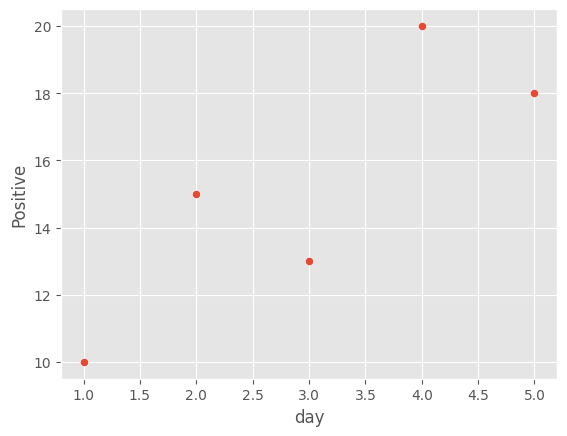

In [51]:
positive = pd.DataFrame({
    'day': [1, 2, 3, 4, 5],
    'Positive': [10, 15, 13, 20, 18]
})

# Plotting the scatter plot
sns.scatterplot(data=positive, x='day', y='Positive')
plt.show()

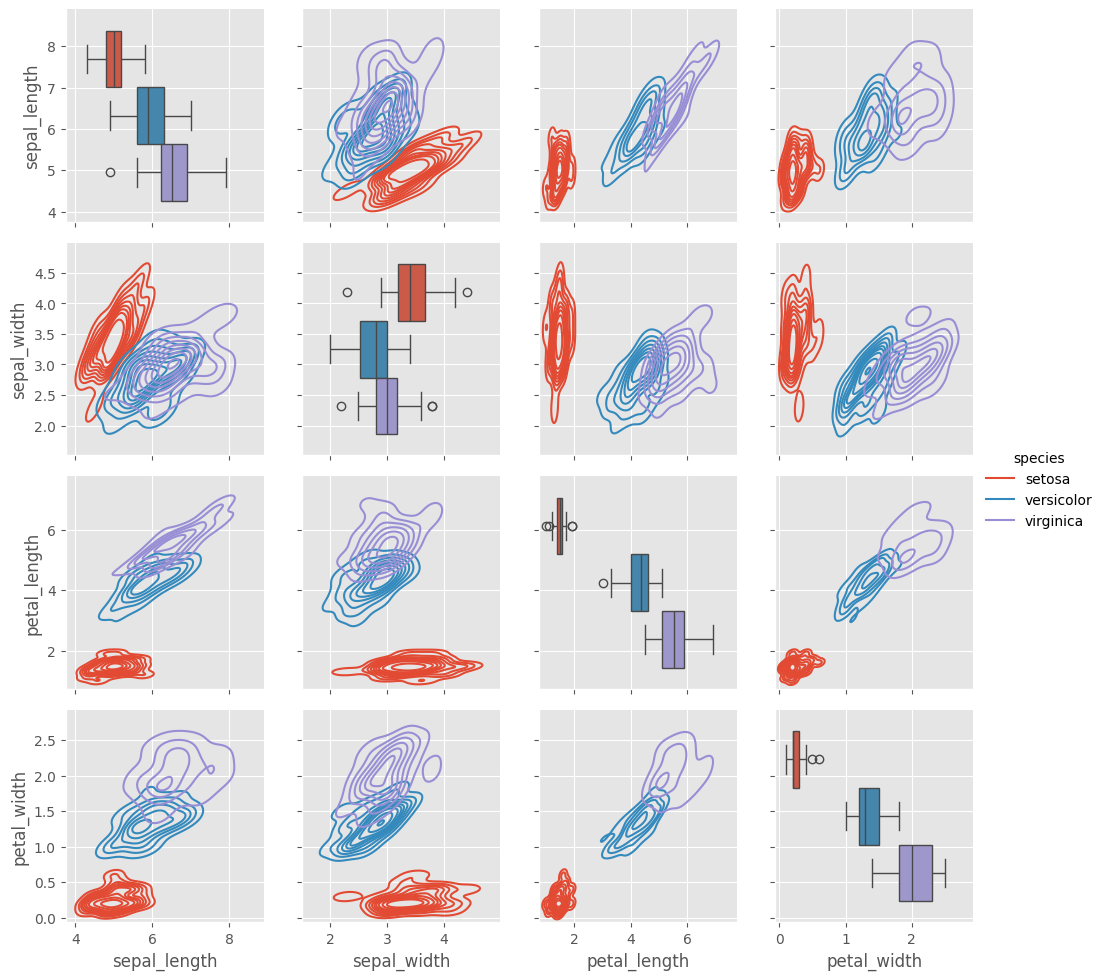

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load the iris dataset
iris = sns.load_dataset('iris')

# Create a PairGrid
g = sns.PairGrid(data=iris, hue='species')
g.map_diag(sns.boxplot)
g.map_offdiag(sns.kdeplot)

# Add legend
g.add_legend()

plt.show()


## **Building LSTM Model**

In [53]:
# Read file from gdrive
import pandas as pd
import numpy as np
data=pd.read_csv('/content/drive/MyDrive/Project21/Twitter_Dataset.csv', encoding='ISO-8859-1')

In [54]:
# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 50000
# Max number of words in each complaint.
MAX_SEQUENCE_LENGTH = 250
# This is fixed.
EMBEDDING_DIM = 100

In [55]:
column_names = ['ID', 'Timestamp', 'Date', 'Query', 'Username', 'Tweet']
data = pd.read_csv('/content/drive/MyDrive/Project21/Twitter_Dataset.csv', encoding='ISO-8859-1', names=column_names)

from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(data['Tweet'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 486343 unique tokens.


In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
X = tokenizer.texts_to_sequences(data['Tweet'].values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)

In [ ]:
#Y = pd.get_dummies(data['sentiment']).values
from sklearn.preprocessing import LabelEncoder
mlb = LabelEncoder()
sentiment = data['Query'].to_numpy()
mlb.fit(sentiment)
Y = mlb.transform(sentiment)
print('Shape of label tensor:', Y.shape)

In [ ]:
# DataSplit
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.10, stratify=Y, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

## **Building CNN Model**

In [ ]:
# Train-Test Split
from sklearn.model_selection import train_test_split
training_bs, test = train_test_split(data,
                                         test_size=0.10,
                                         random_state=42)

In [ ]:
training_bs.loc[training_bs['Tweet']=='positive', 'sentiment_score'] = int(1)
training_bs.loc[training_bs['Tweet']=='negative', 'sentiment_score'] = int(2)
training_bs.loc[training_bs['Tweet']=='no_sentiment', 'sentiment_score'] = int(3)
training_bs.loc[training_bs['Tweet']=='sadness', 'sentiment_score'] = int(4)
training_bs.loc[training_bs['Tweet']=='fear', 'sentiment_score'] = int(5)
training_bs.loc[training_bs['Tweet']=='trust', 'sentiment_score'] = int(6)
training_bs.loc[training_bs['Tweet']=='anger', 'sentiment_score'] = int(7)
training_bs.loc[training_bs['Tweet']=='surprise', 'sentiment_score'] = int(8)
training_bs.loc[training_bs['Tweet']=='joy', 'sentiment_score'] = int(9)
training_bs.loc[training_bs['Tweet']=='disgust', 'sentiment_score'] = int(10)

In [ ]:
## build training vocabulary and get maximum training sentence length and total number of words training data
all_training_words = ''.join([ word for tokens in training_bs["Tweet"] for word in tokens])
training_sentence_lengths = [len(tokens) for tokens in training_bs["Tweet"]]
TRAINING_VOCAB = sorted(list(set(all_training_words)))
print("%s words total, with a vocabulary size of %s" % (len(all_training_words), len(TRAINING_VOCAB)))

In [ ]:
## Build testing vocabulary and get maximum testing sentence length and total number of words in testing data

all_test_words = ''.join([word for tokens in test["Tweet"] for word in tokens])
test_sentence_lengths = [len(tokens) for tokens in test["Tweet"]]
TEST_VOCAB = sorted(list(set(all_test_words)))
print("%s words total, with a vocabulary size of %s" % (len(all_test_words), len(TEST_VOCAB)))
print("Max sentence length is %s" % max(test_sentence_lengths))

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Example parameters
max_vocab_size = 10000  # Number of unique words in the dataset
embedding_dim = 100     # Dimensionality of the embedding vectors
max_sequence_length = 200  # Maximum length of input sequences

# Dummy data for demonstration
# X_train should be preprocessed text sequences and y_train should be the corresponding labels
X_train = np.random.randint(1, max_vocab_size, size=(1000, max_sequence_length))
y_train = np.random.randint(0, 2, size=(1000,))

# Define the model
model = Sequential()
model.add(Embedding(input_dim=max_vocab_size, output_dim=embedding_dim, input_length=max_sequence_length))
model.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
model.add(MaxPooling1D(pool_size=4))
model.add(Flatten())
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Binary classification

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=3, batch_size=32, validation_split=0.2)

Model Architecture

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=3, padding='same', activation='relu',
 input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))
model.summary()

CNN MNIST(Modified National Institute of Standards and Technology) Dataset

In [ ]:
!pip install tensorflow --upgrade

In [ ]:
from tensorflow.keras.datasets import mnist
(xtrain,ytrain),(xtest,ytest)=mnist.load_data()

In [ ]:
from tensorflow.keras.datasets import mnist
# use Keras to import pre-shuffled MNIST database
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print("The MNIST database has a training set of %d examples." % len(X_train))
print("The MNIST database has a test set of %d examples." % len(X_test))

In [ ]:
xtrain.shape

In [ ]:
plt.imshow(xtrain[1,:,:],cmap='gray')

In [ ]:
ytrain[1]

In [ ]:
def visualize_input(img, ax):
    ax.imshow(img, cmap='gray')
    width, height = img.shape
    thresh = img.max()/2.5
    for x in range(width):
        for y in range(height): #Fixed indentation for nested for loop
            ax.annotate(str(round(img[x][y],2)), xy=(y,x),
                        horizontalalignment='center',
                        verticalalignment='center',
                        color='white' if img[x][y]<thresh else 'black')
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111)
visualize_input(X_train[0], ax)

In [ ]:
ytrain[:50]

In [ ]:
L=pd.DataFrame(ytrain)
L[0].value_counts()

In [ ]:
#Represent Training & Testing samples suitable for #tensorflow backend
x_train=xtrain.reshape(xtrain.shape[0],784).astype('float32')
x_test=xtest.reshape(xtest.shape[0],784).astype('float32')


In [ ]:
x_test.shape

In [ ]:
x_train/=255
x_test/=255

In [ ]:
from tensorflow import keras

y_train = keras.utils.to_categorical(ytrain, 10)
y_test = keras.utils.to_categorical(ytest, 10)

In [ ]:
from tensorflow.keras.models import Sequential
# Initialize the constructor

model = Sequential()

# Define model architecture

model.add(Dense(784,activation='relu'))
model.add(Dense(100, activation ='relu'))
model.add(Dense(10,activation='softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
epochs = 3
batch_size = 512


history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=.1, verbose=True)
loss,accuracy  = model.evaluate(x_test, y_test, verbose=False)

In [ ]:
print(history.history['val_accuracy'])

print(history.history['accuracy'])

ta = pd.DataFrame(history.history['accuracy'])
va = pd.DataFrame(history.history['val_accuracy'])

tva = pd.concat([ta,va] , axis=1)

tva.boxplot()

In [ ]:
loss, acc = model.evaluate(x_test, y_test, verbose=0)
print('Accuracy: %.3f'  % acc)
print('Loss: %.3f' % loss)

In [ ]:
import numpy as np

# Flatten and normalize x_test if needed
x_test_flattened = x_test.reshape(-1, 28 * 28) / 255.0  # Flatten to (num_samples, 784) and normalize

# Make predictions
y_predict = model.predict(x_test_flattened)

# Show the first prediction
print(y_predict[0])

In [ ]:
np.argmax(y_predict[0])

In [ ]:
from sklearn import metrics
y_pred = []
for val in y_predict:
    y_pred.append(np.argmax(val))
#print(y_pred)
#convert 0 1 to 1 and 1 0 as 0
cm = metrics.confusion_matrix(ytest,y_pred)
print(cm)

In [ ]:
cr=metrics.classification_report(ytest,y_pred)
print(cr)

<div class="alert alert-block alert-danger">  
<h2><center><strong>Implementing Tensorflow and Keras Model🧪</strong></center></h2>   
</div>

In [ ]:
def tensorflow_based_model(): #Defined tensorflow_based_model function for training tenforflow based model
    inputs = Input(name='inputs',shape=[max_len])#step1
    layer = Embedding(2000,50,input_length=max_len)(inputs) #step2
    layer = LSTM(64)(layer) #step3
    layer = Dense(256,name='FC1')(layer) #step4
    layer = Activation('relu')(layer) # step5
    layer = Dropout(0.5)(layer) # step6
    layer = Dense(1,name='out_layer')(layer) #step4 again but this time its giving only one output as because we need to classify the tweet as positive or negative
    layer = Activation('sigmoid')(layer) #step5 but this time activation function is sigmoid for only one output.
    model = Model(inputs=inputs,outputs=layer) #here we are getting the final output value in the model for classification
    return model #function returning the value when we call it

### Model compilation

In [ ]:
model = tensorflow_based_model() # here we are calling the function of created model
model.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

#### Accuracy
- Accuracy= Total number of correct predictions/Total number of predictions

In [ ]:
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show();

In [ ]:
%matplotlib inline
from matplotlib import pyplot
from numpy import where

# plot loss during training
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.legend()

#### Confusion matrix

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix

# Example data for demonstration
# Replace with your actual data
Y_test = np.array([0, 1, 1, 0, 1])  # Example ground truth labels
y_pred = [0, 1, 1, 0, 1]           # Example predicted labels (as a list)

# Convert y_pred to numpy array if it's not already
y_pred = np.array(y_pred)

# Print the shapes and lengths of Y_test and y_pred
print(f"Shape of Y_test: {Y_test.shape}")
print(f"Length of Y_test: {len(Y_test)}")
print(f"Shape of y_pred: {y_pred.shape}")
print(f"Length of y_pred: {len(y_pred)}")

# Ensure Y_test and y_pred have the same length
if len(Y_test) != len(y_pred):
    raise ValueError("Y_test and y_pred must have the same number of samples.")

# Calculate and print the confusion matrix
CR = confusion_matrix(Y_test, y_pred)
print("Confusion Matrix:")
print(CR)

In [ ]:
print('\n')
print("confusion matrix")
print('\n')
CR=confusion_matrix(Y_test, y_pred)
print(CR)
print('\n')
fig, ax = plot_confusion_matrix(conf_mat=CR,figsize=(5, 5),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

###ROC(Receiver Operating Characteristic) Curve

In [ ]:
fpr, tpr, thresholds = roc_curve(Y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

###Linear model in tensorflow

In [ ]:
import tensorflow as tf
train_X = [3.3, 4.4, 5.5, 6.71, 6.93, 4.168, 9.779, 6.182, 7.59, 2.167,
           7.042, 10.791, 5.313, 7.997, 5.654, 9.27, 3.1]
train_Y = [1.7, 2.76, 2.09, 3.19, 1.694, 1.573, 3.366, 2.596, 2.53, 1.221,
           2.827, 3.465, 1.65, 2.904, 2.42, 2.94, 1.3]
NUM_EXAMPLES = len(train_X)


#create model paramters with initial values
W = tf.Variable(0.)
b = tf.Variable(0.)

#training info
train_steps = 100
learning_rate = 0.01

for i in range(train_steps):

  #watch the gradient flow
  with tf.GradientTape() as tape:

    #forward pass
    yhat = train_X * W + b

    #calcuate the loss (difference squared error)
    error = yhat - train_Y
    loss = tf.reduce_mean(tf.square(error))

  #evalute the gradient with the respect to the paramters
  dW, db = tape.gradient(loss, [W, b])

  #update the paramters using Gradient Descent
  W.assign_sub(dW * learning_rate)
  b.assign_sub(db* learning_rate)

  #print the loss every 20 iterations
  if i % 20 == 0:
    print("Loss at step {:03d}: {:.3f}".format(i, loss))

print(f'W : {W.numpy()} , b  = {b.numpy()} ')

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
# Graphic display
plt.plot(train_X, train_Y, 'ro', label='Original data')
plt.plot(train_X, np.array(W * train_X + b), label='Fitted line')
plt.legend()
plt.show()

In [ ]:
def linear_model(X_val):
  print((W*X_val + b).numpy())
  linear_model(8)

<div class="alert alert-block alert-danger">  
<h2><center><strong>Extract Tensor Slicing</strong></center></h2>   
</div>

In [ ]:
import tensorflow as tf
import numpy as np

In [ ]:
t1 = tf.constant([0, 1, 2, 3, 4, 5, 6, 7])

print(tf.slice(t1,
               begin=[1],
               size=[3]))

In [ ]:
print(t1[1:4])

In [ ]:
print(t1[-3:])

In [ ]:
print(tf.gather(t1,
                indices=[0, 3, 6]))

# This is similar to doing

t1[::3]

In [ ]:
t2 = tf.constant([[0, 1, 2, 3, 4],
                  [5, 6, 7, 8, 9],
                  [10, 11, 12, 13, 14],
                  [15, 16, 17, 18, 19]])

print(t2[:-1, 1:3])

In [ ]:
alphabet = tf.constant(list('abcdefghijklmnopqrstuvwxyz'))

print(tf.gather(alphabet,
                indices=[2, 0, 19, 18]))

Auto Diffrentiation

In [ ]:
x = tf.Variable(2.0)
y = tf.Variable(3.0)

with tf.GradientTape() as t:
  x_sq = x * x
  with t.stop_recording():
    y_sq = y * y
  z = x_sq + y_sq

grad = t.gradient(z, {'x': x, 'y': y})

print('dz/dx:', grad['x'])  # 2*x => 4
print('dz/dy:', grad['y'])

Scalar source

In [ ]:
x = tf.linspace(-10.0, 10.0, 200+1)
delta = tf.Variable(0.0)

with tf.GradientTape() as tape:
  y = tf.nn.sigmoid(x+delta)

dy_dx = tape.jacobian(y, delta)
print(y.shape)
print(dy_dx.shape)

In [ ]:
plt.plot(x.numpy(), y, label='y')
plt.plot(x.numpy(), dy_dx, label='dy/dx')
plt.legend()
_ = plt.xlabel('x')

Tensor Source

In [ ]:
x = tf.random.normal([7, 5])
layer1 = tf.keras.layers.Dense(8, activation=tf.nn.relu)
layer2 = tf.keras.layers.Dense(6, activation=tf.nn.relu)

with tf.GradientTape() as t2:
  with tf.GradientTape() as t1:
    x = layer1(x)
    x = layer2(x)
    loss = tf.reduce_mean(x**2)

  g = t1.gradient(loss, layer1.kernel)

h = t2.jacobian(g, layer1.kernel)
print(f'layer.kernel.shape: {layer1.kernel.shape}')
print(f'h.shape: {h.shape}')

In [ ]:
n_params = tf.reduce_prod(layer1.kernel.shape)

g_vec = tf.reshape(g, [n_params, 1])
h_mat = tf.reshape(h, [n_params, n_params])

In [ ]:
def imshow_zero_center(image, **kwargs):
  lim = tf.reduce_max(abs(image))
  plt.imshow(image, vmin=-lim, vmax=lim, cmap='seismic', **kwargs)
  plt.colorbar()

In [ ]:
imshow_zero_center(h_mat)

##Working with RNNs

In [ ]:
import numpy as np
import tensorflow as tf
import keras
from keras import layers

Built-in RNN layers

In [ ]:
model = keras.Sequential()
# Add an Embedding layer expecting input vocab of size 1000, and
# output embedding dimension of size 64.
model.add(layers.Embedding(input_dim=1000, output_dim=64))

# Add a LSTM layer with 128 internal units.
model.add(layers.LSTM(128))

# Add a Dense layer with 10 units.
model.add(layers.Dense(10))

model.summary()

In [ ]:
encoder_vocab = 1000
decoder_vocab = 2000

encoder_input = layers.Input(shape=(None,))
encoder_embedded = layers.Embedding(input_dim=encoder_vocab, output_dim=64)(
    encoder_input
)

# Return states in addition to output
output, state_h, state_c = layers.LSTM(64, return_state=True, name="encoder")(
    encoder_embedded
)
encoder_state = [state_h, state_c]

decoder_input = layers.Input(shape=(None,))
decoder_embedded = layers.Embedding(input_dim=decoder_vocab, output_dim=64)(
    decoder_input
)

# Pass the 2 states to a new LSTM layer, as initial state
decoder_output = layers.LSTM(64, name="decoder")(
    decoder_embedded, initial_state=encoder_state
)
output = layers.Dense(10)(decoder_output)

model = keras.Model([encoder_input, decoder_input], output)
model.summary()

Bidirectional RNNs

In [ ]:
model = keras.Sequential()

model.add(
    layers.Bidirectional(layers.LSTM(64, return_sequences=True), input_shape=(5, 10))
)
model.add(layers.Bidirectional(layers.LSTM(32)))
model.add(layers.Dense(10))

model.summary()

##Working with preprocessing layers

In [ ]:
data = np.array(
    [
        [0.1, 0.2, 0.3],
        [0.8, 0.9, 1.0],
        [1.5, 1.6, 1.7],
    ]
)
layer = layers.Normalization()
layer.adapt(data)
normalized_data = layer(data)

print("Features mean: %.2f" % (normalized_data.numpy().mean()))
print("Features std: %.2f" % (normalized_data.numpy().std()))

In [ ]:
vocab = ["a", "b", "c", "d"]
data = tf.constant([["a", "c", "d"], ["d", "z", "b"]])
layer = layers.StringLookup(vocabulary=vocab)
vectorized_data = layer(data)
print(vectorized_data)

In [ ]:
#Encoding string categorical features via one-hot encoding
# Define some toy data
data = tf.constant([["a"], ["b"], ["c"], ["b"], ["c"], ["a"]])

# Use StringLookup to build an index of the feature values and encode output.
lookup = layers.StringLookup(output_mode="one_hot")
lookup.adapt(data)

# Convert new test data (which includes unknown feature values)
test_data = tf.constant([["a"], ["b"], ["c"], ["d"], ["e"], [""]])
encoded_data = lookup(test_data)
print(encoded_data)

In [ ]:
#Encoding text as a dense matrix of N-grams with TF-IDF weighting

# Define some text data to adapt the layer
adapt_data = tf.constant(
    [
        "The Brain is wider than the Sky",
        "For put them side by side",
        "The one the other will contain",
        "With ease and You beside",
    ]
)
# Instantiate TextVectorization with "tf-idf" output_mode
# (multi-hot with TF-IDF weighting) and ngrams=2 (index all bigrams)
text_vectorizer = layers.TextVectorization(output_mode="tf-idf", ngrams=2)
# Index the bigrams and learn the TF-IDF weights via `adapt()`
text_vectorizer.adapt(adapt_data)

# Try out the layer
print(
    "Encoded text:\n",
    text_vectorizer(["The Brain is deeper than the sea"]).numpy(),
)

# Create a simple model
inputs = keras.Input(shape=(text_vectorizer.vocabulary_size(),))
outputs = layers.Dense(1)(inputs)
model = keras.Model(inputs, outputs)

# Create a labeled dataset (which includes unknown tokens)
train_dataset = tf.data.Dataset.from_tensor_slices(
    (["The Brain is deeper than the sea", "for if they are held Blue to Blue"], [1, 0])
)

# Preprocess the string inputs, turning them into int sequences
train_dataset = train_dataset.batch(2).map(lambda x, y: (text_vectorizer(x), y))
# Train the model on the int sequences
print("\nTraining model...")
model.compile(optimizer="rmsprop", loss="mse")
model.fit(train_dataset)

# For inference, you can export a model that accepts strings as input
inputs = keras.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
outputs = model(x)
end_to_end_model = keras.Model(inputs, outputs)

# Call the end-to-end model on test data (which includes unknown tokens)
print("\nCalling end-to-end model on test string...")
test_data = tf.constant(["The one the other will absorb"])
test_output = end_to_end_model(test_data)
print("Model output:", test_output)